In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import warnings; warnings.simplefilter('ignore')

import splat.simulate as spsim
import astropy.units as u
from astropy.coordinates import SkyCoord

import matplotlib as mpl
from tqdm import tqdm
import wisps
import wisps.simulations as wispsim



In [2]:
def xyzr(d, v, theta):
    x=d*((1-v**2)**0.5)*np.cos(theta)
    y=d*((1-v**2)**0.5)*np.sin(theta)
    z=d*v
    r=(x**2+y**2)**0.5
    return x, y, z, r

In [3]:
d=np.random.uniform(0, 1, 10000)
v=np.random.uniform(-1, 1, 10000)
theta=np.random.uniform(-np.pi, np.pi, 10000)
x, y, z, r=xyzr(d, v, theta)

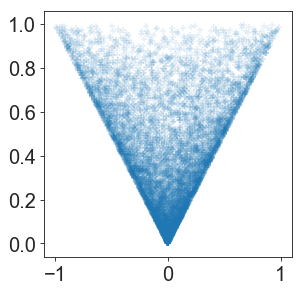

In [4]:
fig, ax=plt.subplots(figsize=(4, 4))
plt.scatter(x, r, marker='+', alpha=0.1)

In [5]:
def lnprob(direction, dmax, dmin):
    """
    probability density in all directions
    """
    d, cosb, l=direction
    if ((d>=dmax) or (d<=dmin)) or (abs(cosb) >=1) or ((l >=np.pi) or (l<=-np.pi)):
        return -np.inf
    else:
        x, y, z, r=xyzr(d, cosb, l)
        return np.log((d**3)*spsim.galactic_density_juric(r, z, unit='pc', center='sun').value)
    
    
def sample_prob(dmax, dmin=0.0):
    ##sample the liliekhood function 
    ndim = 3
    nwalkers = 250
    p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(dmax, 0.0))
    sampler.run_mcmc(p0, 200)
    return sampler

In [ ]:
dmaxs=[0.001, 0.01, 0.1, 0.2, 0.3, 1.0, 3.0, 10.0, 20.0]*1000
samplers=[]
for d in dmaxs:
    samplers.append(sample_prob(d, dmin=0.0))

In [ ]:
coords=[]
for sampler in samplers:
    ds=sampler.flatchain[:,0]
    us=sampler.flatchain[:,1]
    thetas=sampler.flatchain[:,2]
    lat=np.arccos(us)-np.pi/2
    coord=SkyCoord(l=thetas*u.radian, b=lat*u.radian, distance=ds*u.pc, frame='galactic')
    coords.append(coord)
    

In [ ]:
fig=plt.figure( figsize=(12, 10))
for idx in range(1, 9):
    
    coord=coords[idx-1]
    ax=fig.add_subplot(2, 4, idx, projection="mollweide")
    ax.scatter(coord.galactic.l.wrap_at(180*u.degree).radian,
             coord.galactic.b.radian, alpha=0.01,marker='+')
    ax.set_title('dmax = {} pc'.format(int(dmaxs[idx-1])))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.subplots_adjust(hspace = 0.01)
plt.tight_layout()

In [ ]:
fig=plt.figure( figsize=(12, 10))
for idx in range(1, 9):
    
    coord=coords[idx-1]
    ax=fig.add_subplot(2, 4, idx)
    h=ax.hist2d((coord.cartesian.x**2+coord.cartesian.y**2)**0.5,
             coord.cartesian.z, bins=10, cmap='Blues')
    ax.set_title('dmax = {} pc'.format(int(dmaxs[idx-1]*1000)))
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
plt.subplots_adjust(hspace = 0.01)
plt.tight_layout()

In [ ]:
coord=coords[-1]

In [ ]:
H, xedges, yedges = np.histogram2d(coord.galactic.l.wrap_at(180*u.degree).radian, coord.galactic.b.radian, bins=100.0)
H = H.T  # Let each row list bins with common y range.

In [ ]:
#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
#ax.imshow(H, cmap='viridis')

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coord.galactic.l.wrap_at(180*u.degree).radian,
             coord.galactic.b.radian, alpha=0.01,marker='+',  cmap='viridis')

ax.scatter(wispsim.OBSERVED_POINTINGS.galactic.l.wrap_at(180*u.degree).radian,
          wispsim.OBSERVED_POINTINGS.galactic.b.radian, s=100.0, marker='+', color='#2ECC40')
plt.xlabel('l', fontsize=18)
plt.ylabel('b', fontsize=18)
plt.savefig(wisps.OUTPUT_FIGURES+'/skymap_simulations.pdf')

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coord.icrs.ra.wrap_at(180*u.degree).radian, coord.icrs.dec.radian, alpha=0.05, s=10.0, marker='.')
plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)

In [ ]:
fig, ax= plt.subplots()
ax.scatter(coord.galactic.l, coord.galactic.b, alpha=0.05, s=10.0, marker='.')
plt.xlabel('l', fontsize=18)
plt.ylabel('b', fontsize=18)

In [ ]:
import seaborn as sns
import astropy.coordinates as astrocoord

In [ ]:
x=coord.cartesian.x
y=coord.cartesian.y
z=coord.cartesian.z

In [ ]:
plt.scatter(x, y, marker='+', alpha=0.1)
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')

In [ ]:
#sns.distplot(x.value, y.value)

In [ ]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 
fig = plt.figure()

ax = Axes3D(fig)


ax.scatter(coord.cartesian.x, coord.cartesian.y, 
           coord.cartesian.z, marker='+',
           alpha=0.1, s=2)

ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])
ax.set_zlim([-5, 5])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


In [ ]:
#

In [ ]:
lspan=np.linspace(-np.pi, np.pi, 1000)
bspan=np.linspace(-1,1, 1000)
dspan=np.linspace(0, 300, 1000)
directionss=np.array([dspan, bspan, lspan ])

In [ ]:

plt.figure()
#plt.plot(dspan, np.array(list(map(lambda x: np.exp(lnprob(x, 0,200.0)), directionss.T))))
plt.plot(sampler.flatchain[:,0], np.concatenate(np.exp(sampler.lnprobability)), ',')#)#, 100, color="k", histtype="step")
#plt.xscale('log')

plt.xlabel('d (kpc)', fontsize=18)
plt.ylabel('probability ', fontsize=18)

In [ ]:
plt.figure()
#plt.plot(dspan, np.array(list(map(lambda x: np.exp(lnprob(x, 0,200.0)), directionss.T))))
plt.scatter(coord.cartesian.z, np.concatenate(np.exp(sampler.lnprobability)), alpha=0.1, marker='+')#)#, 100, color="k", histtype="step")

plt.xlabel('z', fontsize=18)
plt.ylabel('probability ', fontsize=18)

In [ ]:
plt.figure()
plt.scatter((coord.cartesian.y**2+coord.cartesian.x**2)**0.5, 
            np.concatenate(np.exp(sampler.lnprobability)), alpha=0.01, marker='+')#)#, 100, color="k", histtype="step")

#plt.xlim([-50, 50])
plt.xlabel('r', fontsize=18)

plt.ylabel('probability ', fontsize=18)

In [ ]:
def get_cdf(data, bins=1000):
    counts, bin_edges = np.histogram(data, bins=bins, normed=False)
    cdf = np.cumsum(counts)/len(data)
    return np.array(cdf), np.array(counts), np.array(bin_edges)[:-1]

In [ ]:
import bisect
def random_generator(vals, cdf):
    x = np.random.rand()
    idx = bisect.bisect(cdf, x) 
    return vals[idx]

In [ ]:
# Use the histogram function to bin the data
data=sampler.flatchain
cdf, counts, vals=get_cdf(data[:,0], bins=1000)

In [ ]:
#

In [ ]:
fig, ax=plt.subplots(ncols=3, nrows=2, figsize=(12, 4*2))
ax[0][0].hist(samplers[-4].flatchain[:,0])
ax[0][1].hist(samplers[-4].flatchain[:,1])
ax[0][2].hist(np.arccos(samplers[-4].flatchain[:,2]))

ax[1][0].hist(samplers[-1].flatchain[:,0])
ax[1][1].hist(samplers[-1].flatchain[:,1])
ax[1][2].hist(np.arccos(samplers[-1].flatchain[:,2]))
plt.tight_layout()

In [ ]:
plt.plot(samplers[0].flatchain[:,0])

In [ ]:
len(dmaxs)

In [ ]:
np.array(dmaxs)